In [166]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
data = pd.read_csv("covid_19.csv")
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [168]:
data.shape

(58, 18)

In [169]:
data.nunique()

Province_State          58
Country_Region           1
Last_Update              1
Lat                     56
Long_                   56
Confirmed               58
Deaths                  56
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                     6
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [171]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

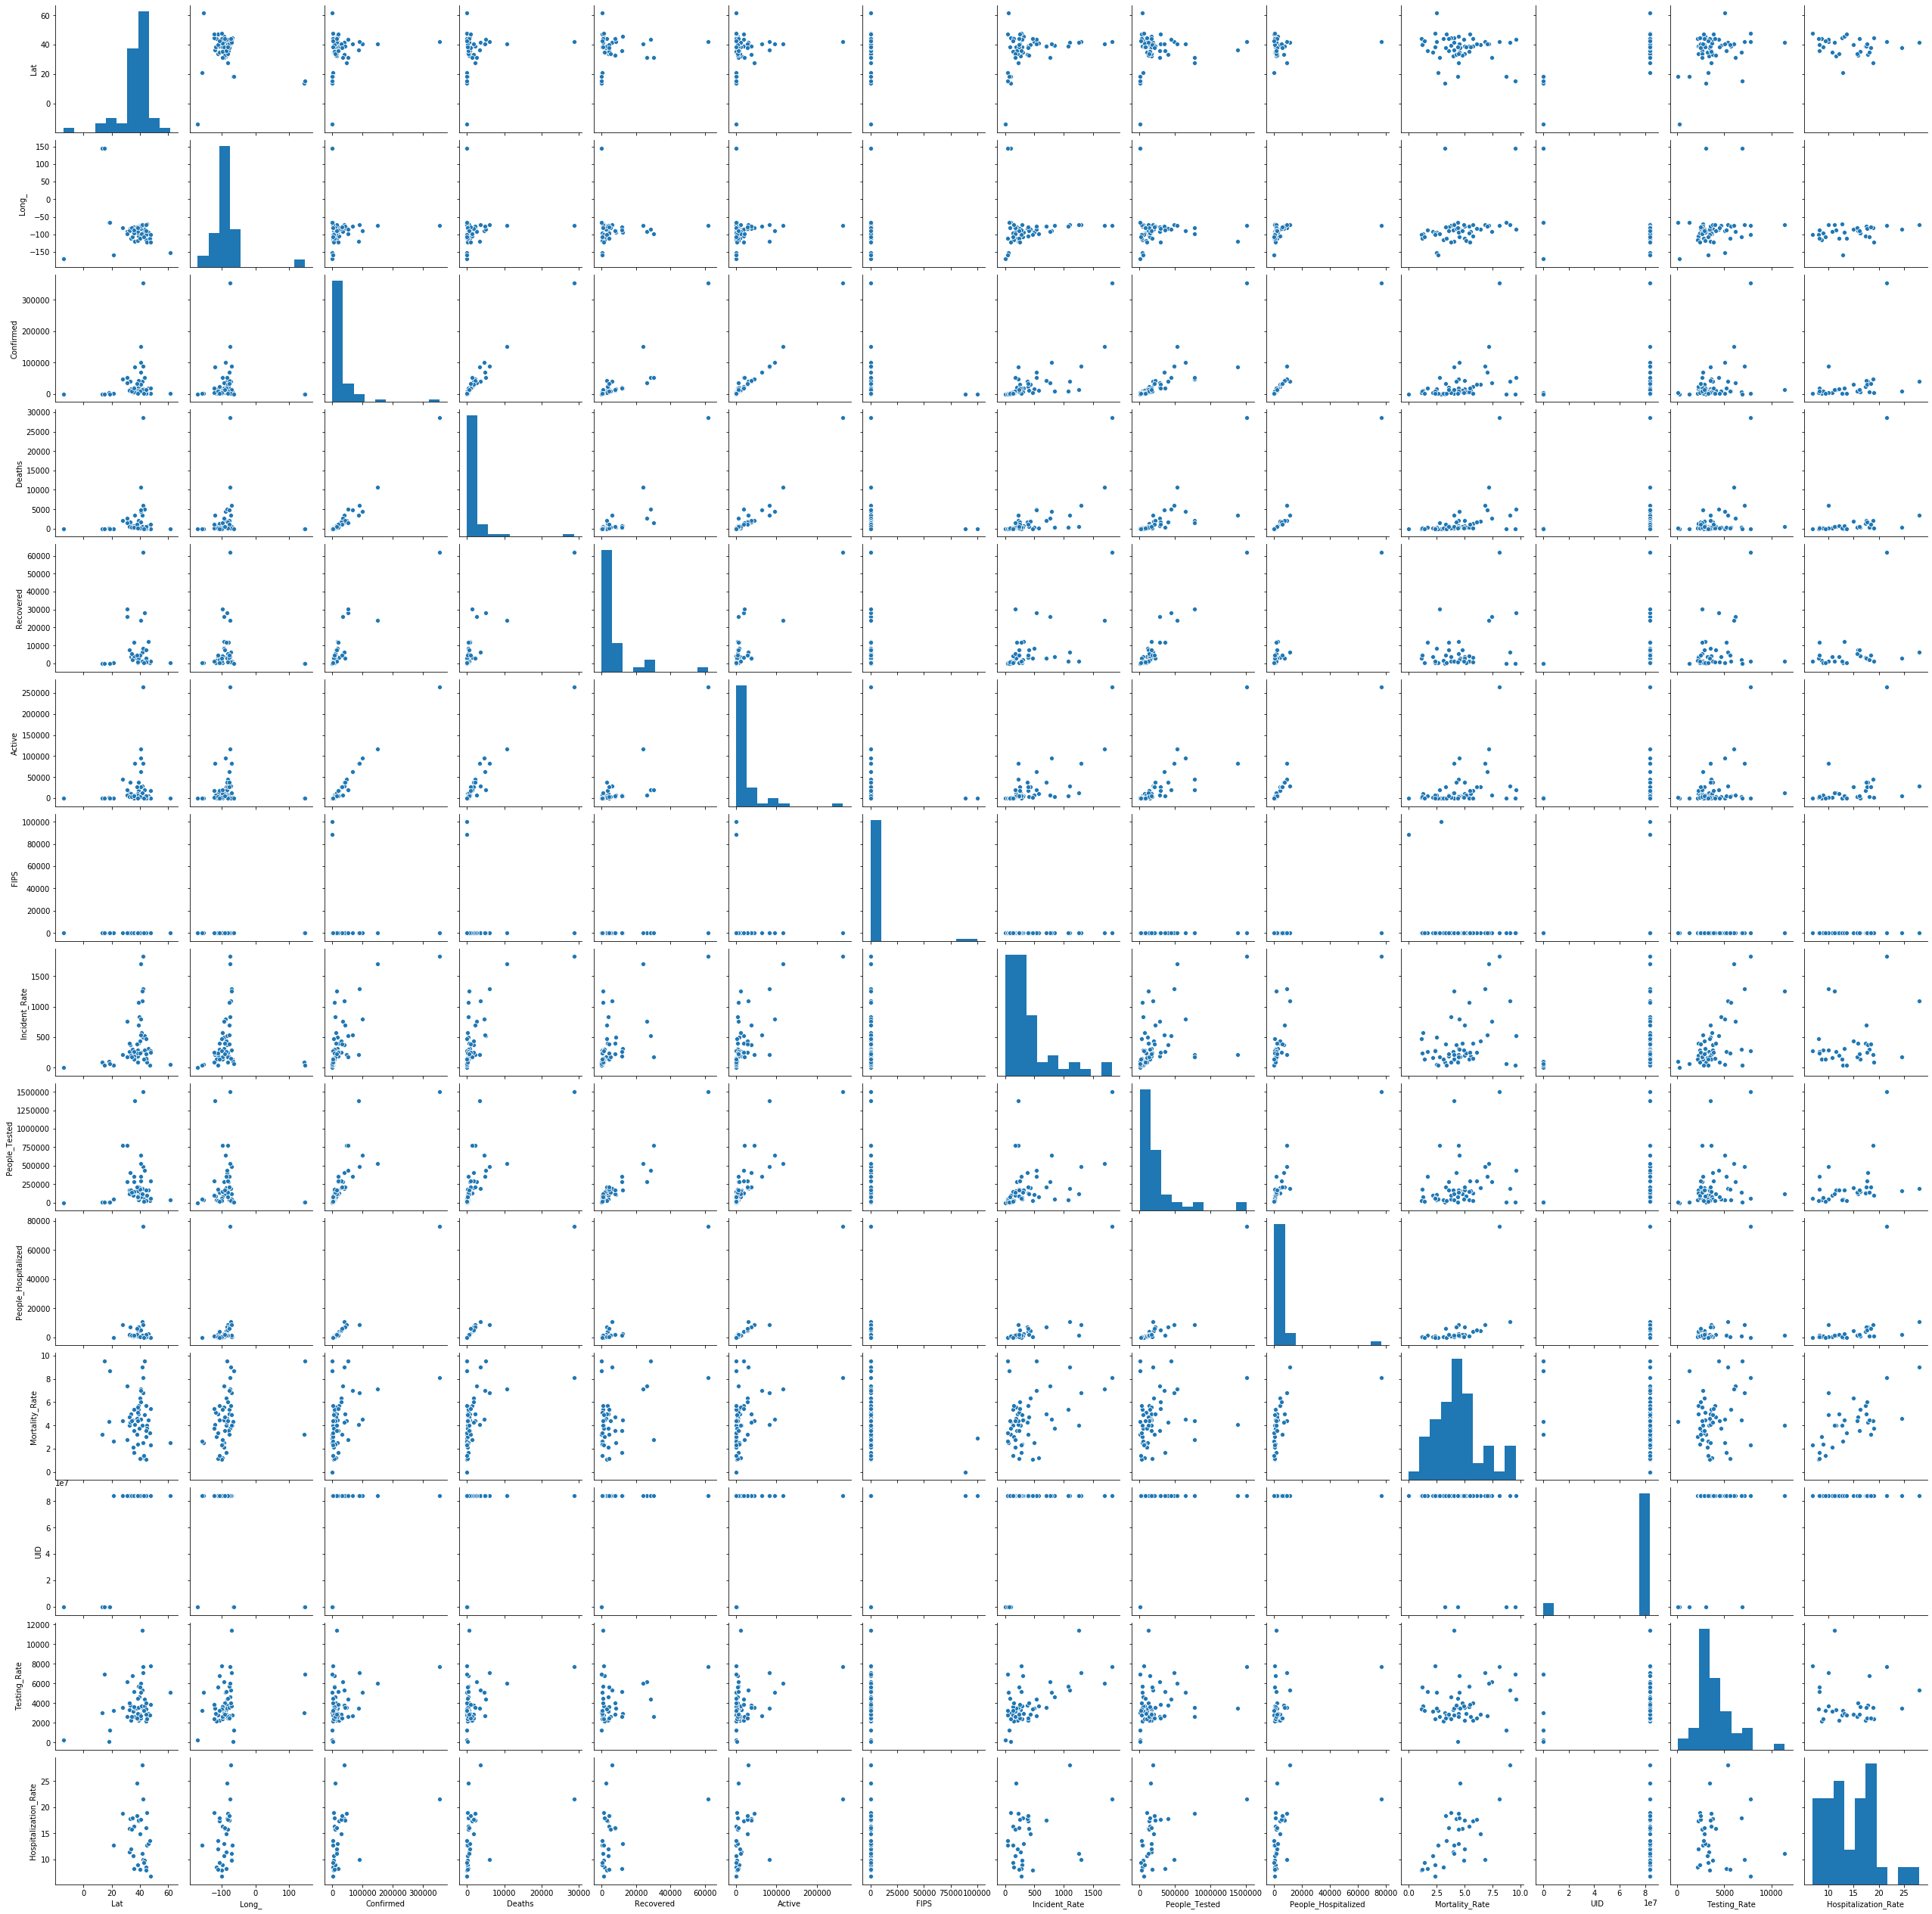

In [172]:
sns.pairplot(data)

We can see the variations of x inputs wrt y variables

In [173]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [174]:
#replacing missing values ny mode
data['Lat'].fillna(data['Lat'].mode()[0], inplace=True)
data['Long_'].fillna(data['Long_'].mode()[0], inplace=True)
data['Incident_Rate'].fillna(data['Incident_Rate'].mode()[0], inplace=True)
data['People_Tested'].fillna(data['People_Tested'].mode()[0], inplace=True)
data['People_Hospitalized'].fillna(data['People_Hospitalized'].mode()[0], inplace=True)
data['Mortality_Rate'].fillna(data['Mortality_Rate'].mode()[0], inplace=True)
data['Testing_Rate'].fillna(data['Testing_Rate'].mode()[0], inplace=True)
data['Hospitalization_Rate'].fillna(data['Hospitalization_Rate'].mode()[0], inplace=True)
data['Recovered'].fillna(data['Recovered'].mode()[0], inplace=True)




In [175]:
data.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [176]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [177]:
data.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [178]:

from sklearn.preprocessing import LabelEncoder
column = ['Province_State', 'Country_Region', 'Last_Update', 'ISO3','Long_']
le = LabelEncoder()
for i in column:
    data[i] = le.fit_transform(data[i].astype(str))

print(data.dtypes)

Province_State            int32
Country_Region            int32
Last_Update               int32
Lat                     float64
Long_                     int32
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object


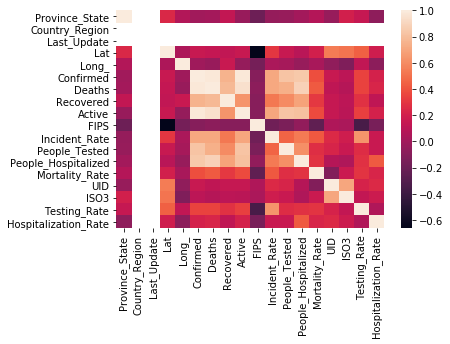

In [179]:
data_cor=data.corr()
sns.heatmap(data_cor)

In [180]:
data.skew()

Province_State          0.000000
Country_Region          0.000000
Last_Update             0.000000
Lat                    -2.245222
Long_                   0.069826
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.650619
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.961954
People_Tested           2.812284
People_Hospitalized     6.893838
Mortality_Rate          0.400879
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.046881
Hospitalization_Rate    1.154297
dtype: float64

In [181]:
skew=( 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized',  'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate')
for col in skew :
    if data.skew().loc[col]>0.55:
        data[col] = np.log1p(data[col])

In [182]:
data.skew()

Province_State          0.000000
Country_Region          0.000000
Last_Update             0.000000
Lat                    -2.245222
Long_                   0.069826
Confirmed              -1.374603
Deaths                 -0.568714
Recovered              -0.273583
Active                 -0.994488
FIPS                    3.421540
Incident_Rate          -2.038061
People_Tested          -1.710600
People_Hospitalized     0.690735
Mortality_Rate          0.400879
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate           -2.573004
Hospitalization_Rate    0.659980
dtype: float64

In [183]:
X = data[[ 'Last_Update','Confirmed','Recovered']]
y = data['Deaths']


In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [185]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
print(lm.intercept_)

-3.0437279397551427


In [187]:
coeff_data = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [188]:
coeff_data

,Coefficient
Last_Update,0.000000
Confirmed,0.997399
Recovered,-0.041557


In [189]:
predictions = lm.predict(X_test)  

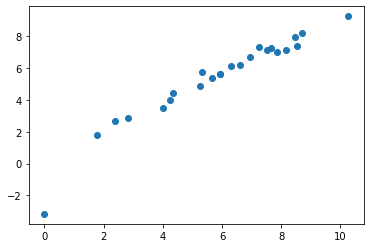

In [190]:
plt.scatter(y_test,predictions)


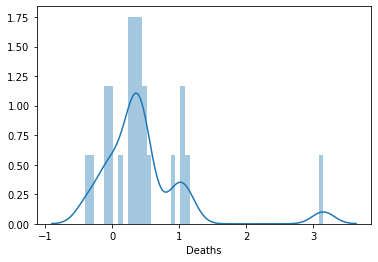

In [191]:
sns.distplot((y_test-predictions),bins=50); 

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

In [192]:
#Regression Evaluation Metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 0.5371477425281571
MSE: 0.679205404228337
RMSE: 0.8241391898389112


Hence,We have predicted the death rate

In [193]:
from sklearn.externals import joblib
#save the model 
joblib.dump(lm, 'Project9.obj')

['Project9.obj']